In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from openTSNE import TSNE

from sklearn import datasets
import seaborn as sns
import pandas as pd
import torch
import pickle
import os

iris = datasets.load_iris()
x, y = iris['data'], iris['target']
X_reduced = TSNE().fit(x)

In [41]:
# mapping for id to relations
conceptnet_id_to_relation = {
    0: 'HasSubevent',
    1: 'MadeOf',
    2: 'HasPrerequisite',
    3: 'MotivatedByGoal',
    4: 'AtLocation',
    5: 'CausesDesire',
    6: 'IsA',
    7: 'NotDesires',
    8: 'Desires',
    9: 'CapableOf',
    10: 'PartOf',
    11: 'HasA',
    12: 'UsedFor',
    13: 'ReceivesAction',
    14: 'Causes',
    15: 'HasProperty'
}

In [42]:
def load_embeddings(embedding_pth: str, relation_ids_pth: str):
    assert os.path.exists(embedding_pth) and os.path.exists(relation_ids_pth)
    embeddings = pickle.load(open(embedding_pth, 'rb'))
    relation_ids = pickle.load(open(relation_ids_pth, 'rb'))
    reduced_embeddings = TSNE().fit(embeddings)
    relations = list(map(conceptnet_id_to_relation.get, relation_ids))
    return reduced_embeddings, relations

def get_dataframe(reduced_embeddings, relations):
    df = pd.DataFrame(reduced_embeddings, columns=['X', 'Y'])
    df['Relation'] = pd.Series(relations)
    return df

In [39]:
sns.set()
sns.set_style('white')

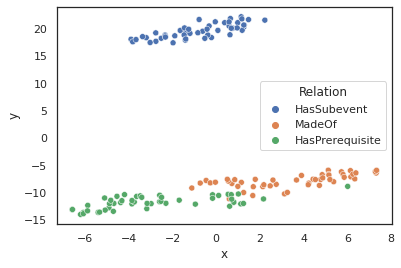

In [40]:
df = pd.DataFrame(X_reduced, columns=['x', 'y'])
df['Relation'] = pd.Series(list(map(conceptnet_id_to_relation.get, y.tolist())))
sns.scatterplot('x', 'y', hue='Relation', data=df)
plt.show()